Linear Regression using Numpy

In [30]:
# !pip install numpy
import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
class LinearRegression:
    def __init__(self, learning_rate = 0.01, iterations = 1000):
        self.lr = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            # y = mx + c
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr*db
            
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def mse(self, y_pred, y):
        mse = np.mean((y_pred-y)**2)
        return mse
    
    def coeff(self):
        return self.weights, self.bias

In [40]:
X, y = ds.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
X_train.shape

(80, 1)

In [49]:
reg = LinearRegression(learning_rate = 0.01, iterations = 1000)
reg.fit(X_train, y_train)

In [50]:
pred = reg.predict(X_test)

In [51]:
reg.mse(pred, y_test)

np.float64(386.61971389548313)

In [52]:
y_pred_line = reg.predict(X)

In [54]:
reg.coeff()

(array([81.94176664]), np.float64(4.292136701646792))

/var/folders/pf/s0n78_vs64v0vtrn00qhlvx40000gn/T/ipykernel_87322/666896693.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


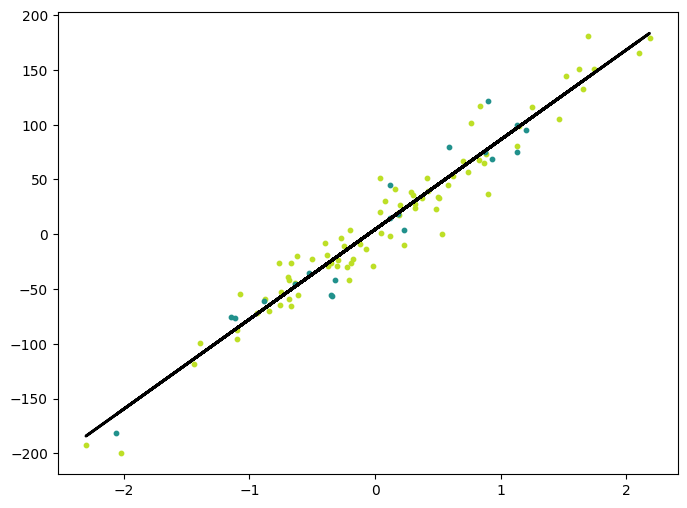

In [53]:
cmap = plt.cm.get_cmap('viridis')
fig = plt.figure(figsize = (8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Predictions")
plt.show()

Linear Regression - Normal Equation

A good video by Jazon Jiao - https://www.youtube.com/watch?v=HY_VtvUKock&t=5s
### Practice problem: https://www.deep-ml.com/problems/14
### Solution:
```
import numpy as np
def linear_regression_normal_equation(X: list[list[float]], y: list[float]) -> list[float]:
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    X_transpose = X.T
    theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    theta = np.round(theta, 4).flatten().tolist()
    return theta
```

## Improvements
here are some improvements to the simple linear regression implementation to make it more robust:

1. Add input validation: Add input validation to check that the input arrays X and y have the same length and are not empty.

2. Add regularization: Regularization can help prevent overfitting by adding a penalty term to the cost function. One common regularization technique is L2 regularization, which adds the sum of squares of the coefficients to the cost function. This can be easily added to the code by adding a regularization parameter to the constructor.

3. Use gradient descent: For large datasets, calculating the inverse of the matrix in the normal equation can be computationally expensive. To overcome this, we can use gradient descent to minimize the cost function. This can be implemented by adding a method that updates the coefficients iteratively using the gradient descent algorithm.

Linear Regression using Gradient Descent - https://www.youtube.com/watch?v=VmbA0pi2cRQ

1. dm = -(2/n) * x * (y - (m * x + b))
2. db = -(2/n) * (y - (m * x + b))

In [62]:
import pandas as pd

def gradient_descent(m_now, b_now, X, y, L):
    m_grad = 0
    b_grad = 0
    n_samples, n_features = X.shape

    for i in range(n_samples):
        m_grad += -(2/n_samples) * X[i] * (y[i] - (m_now * X[i] + b_now))
        b_grad += -(2/n_samples) * (y[i] - (m_now * X[i] + b_now))

        m_now -= L*m_grad
        b_now -= L*b_grad

    return m_now, b_now


In [63]:
m = 0
b = 0
L = 0.01
epochs = 1000

for _ in range(epochs):
    m, b = gradient_descent(m, b, X_train, y_train, L)

In [64]:
m, b

(array([79.74776259]), array([5.2442713]))

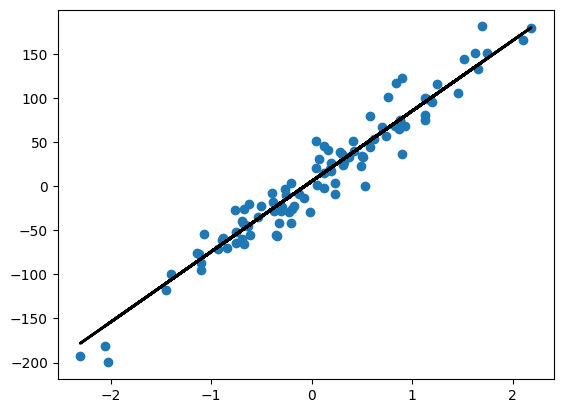

In [66]:
plt.scatter(X, y)
plt.plot(X, m*X+b, color='black', linewidth=2, label="Predictions")
plt.show()